In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
SHOT_DIFFICULTY = 0.1
K = 1.2  # ratio of offense to defense relative value

o_ratio = (2 * K) / (K + 1)  # TODO: implement this as gs.Contest()
d_ratio = 2.0 - o_ratio

SD_SHOOTER = 0.5
SD_DEFENDER = 0.25

In [3]:
def effective_probability(base, shooter, defender):
    print(shooter, " ", defender)

    # probability = P(s - d > base)

    # E(s - d) = (E(s) - E(d)
    # E(s - d) = s - d
    s = (shooter / 20.0) * o_ratio
    d = (defender / 20.0) * d_ratio
    E = s - d
    print("Expected Value:", E)

    # Var(s - d) = Var(s) + Var(d)
    # sd(s - d) = sqrt(Var(s - d))
    # sd(s - d) = sqrt(sds^2 + sdd^2)
    var = SD_SHOOTER**2 + SD_DEFENDER**2
    print("Variance:", var)
    sd = np.sqrt(var)
    print("SD:", sd)
    
    # s - d ~ N(E, sd)
    result = 1 - stats.norm.cdf(base, E, sd)
    print(result)
    print("---")
    return result

effective_probability(SHOT_DIFFICULTY, 10, 10)

10   10
Expected Value: 0.09090909090909083
Variance: 0.3125
SD: 0.5590169943749475
0.4935125618902082
---


0.4935125618902082

In [4]:
df = pd.DataFrame([
    [effective_probability(SHOT_DIFFICULTY, 1+off, 1+dfe) for dfe in range(20)] for off in range(20)
])
df.index = range(1, 21)
df.columns = range(1, 21)
df.index.name = "shooter"
df.columns.name = "defender"
df

1   1
Expected Value: 0.00909090909090908
Variance: 0.3125
SD: 0.5590169943749475
0.4354075888760994
---
1   2
Expected Value: -0.03636363636363638
Variance: 0.3125
SD: 0.5590169943749475
0.4036407015069171
---
1   3
Expected Value: -0.08181818181818185
Variance: 0.3125
SD: 0.5590169943749475
0.37249735321126076
---
1   4
Expected Value: -0.12727272727272732
Variance: 0.3125
SD: 0.5590169943749475
0.34216639326828246
---
1   5
Expected Value: -0.17272727272727276
Variance: 0.3125
SD: 0.5590169943749475
0.312821183296923
---
1   6
Expected Value: -0.21818181818181823
Variance: 0.3125
SD: 0.5590169943749475
0.28461667711670857
---
1   7
Expected Value: -0.2636363636363636
Variance: 0.3125
SD: 0.5590169943749475
0.2576870715607754
---
1   8
Expected Value: -0.30909090909090914
Variance: 0.3125
SD: 0.5590169943749475
0.23214408368521178
---
1   9
Expected Value: -0.35454545454545455
Variance: 0.3125
SD: 0.5590169943749475
0.20807588349315242
---
1   10
Expected Value: -0.4
Variance: 0.3125

defender,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
shooter,,,,,,,,,,,,,,,,,,,,
1,0.435408,0.403641,0.372497,0.342166,0.312821,0.284617,0.257687,0.232144,0.208076,0.185547,0.164597,0.145244,0.127485,0.111294,0.096632,0.083440,0.071651,0.061183,0.051950,0.043861
2,0.474067,0.441818,0.409950,0.378667,0.348159,0.318604,0.290160,0.262965,0.237137,0.212768,0.189927,0.168659,0.148987,0.130910,0.114409,0.099445,0.085964,0.073900,0.063175,0.053702
3,0.512973,0.480545,0.448244,0.416284,0.384867,0.354190,0.324431,0.295753,0.268298,0.242189,0.217522,0.194371,0.172786,0.152794,0.134398,0.117584,0.102317,0.088545,0.076203,0.065217
4,0.551756,0.519455,0.487027,0.454684,0.422639,0.391098,0.360257,0.330301,0.301394,0.273685,0.247298,0.222336,0.198877,0.176976,0.156664,0.137950,0.120822,0.105249,0.091182,0.078560
5,0.590050,0.558182,0.525933,0.493513,0.461135,0.429014,0.397356,0.366360,0.336213,0.307084,0.279125,0.252464,0.227210,0.203445,0.181229,0.160599,0.141565,0.124122,0.108241,0.093878
6,0.627503,0.596359,0.564592,0.532403,0.500000,0.467597,0.435408,0.403641,0.372497,0.342166,0.312821,0.284617,0.257687,0.232144,0.208076,0.185547,0.164597,0.145244,0.127485,0.111294
7,0.663787,0.633640,0.602644,0.570986,0.538865,0.506487,0.474067,0.441818,0.409950,0.378667,0.348159,0.318604,0.290160,0.262965,0.237137,0.212768,0.189927,0.168659,0.148987,0.130910
8,0.698606,0.669699,0.639743,0.608902,0.577361,0.545316,0.512973,0.480545,0.448244,0.416284,0.384867,0.354190,0.324431,0.295753,0.268298,0.242189,0.217522,0.194371,0.172786,0.152794
9,0.731702,0.704247,0.675569,0.645810,0.615133,0.583716,0.551756,0.519455,0.487027,0.454684,0.422639,0.391098,0.360257,0.330301,0.301394,0.273685,0.247298,0.222336,0.198877,0.176976


0.1 1.2


<AxesSubplot:xlabel='defender', ylabel='shooter'>

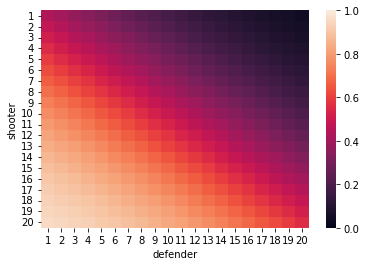

In [5]:
print(SHOT_DIFFICULTY, K)
sns.heatmap(df, vmin=0.0, vmax=1.0)